### We examine the relations between forces, encoders, steps, and positions
This test was done on Thursday night (3/4/20)

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
start = Time('2020-03-05T22:53:00') #this is UTC
end = Time('2020-03-05T22:59:00') 

In [3]:
def readSqXlsx(c1,c2):
    wb = load_workbook(filename='M2basicTest.xlsx', read_only=True)
    ws = wb['Sheet1']
    data_rows = []
    for row in ws[c1:c2]:
        data_cols = []
        for cell in row:
            data_cols.append(cell.value)
        data_rows.append(data_cols)
    return np.array(data_rows)
def getSlope(x, y):
    return np.mean(y[1:]-y[:-1])/np.mean(x[1:]-x[:-1])
def getDelta(y):
    return np.mean(y[1:]-y[:-1])

#### We recorded some data in the Excel file by hand. Let's look at those first
Closed loop: the input was B1 force

In [4]:
aa = readSqXlsx('C14','N19')

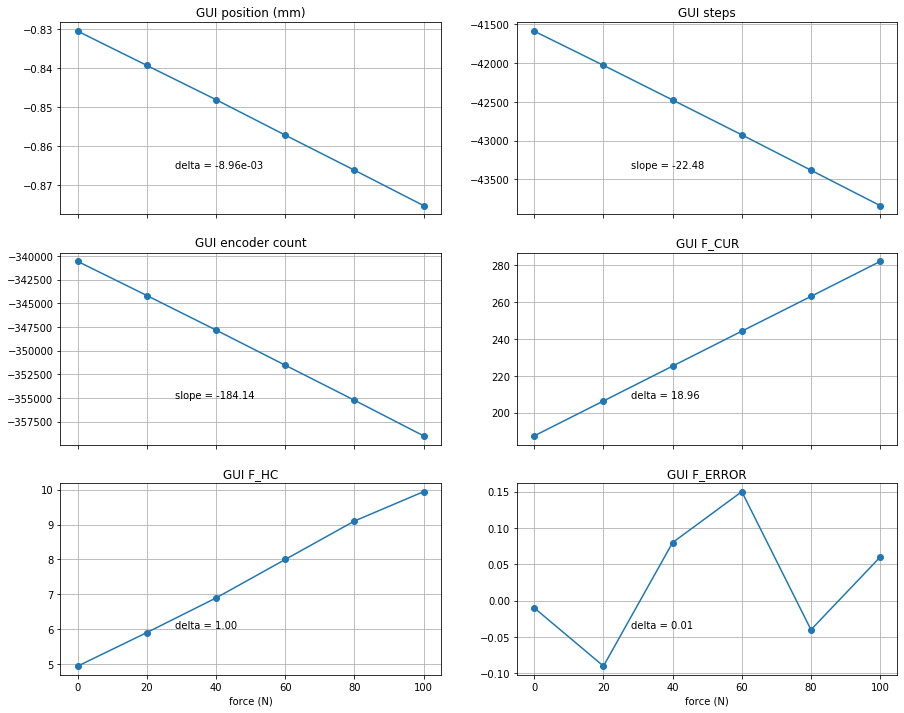

In [5]:
fig, ax = plt.subplots(3,2, figsize=(15, 3*4), sharex=True)
inF = aa[:,0]
guimm = aa[:,1]
ax[0][0].plot(inF, guimm,'-o')
ax[0][0].text(0.3, 0.24, "delta = %.2e"%getDelta(guimm), color = 'black', transform=ax[0][0].transAxes)
ax[0][0].grid()
ax[0][0].set_title('GUI position (mm)');

guisteps = aa[:,2]
ax[0][1].plot(inF, guisteps,'-o')
ax[0][1].text(0.3, 0.24, "slope = %.2f"%getSlope(inF,guisteps), color = 'black', transform=ax[0][1].transAxes)
ax[0][1].grid()
ax[0][1].set_title('GUI steps');

guiec = aa[:,3]
ax[1][0].plot(inF, guiec,'-o')
ax[1][0].text(0.3, 0.24, "slope = %.2f"%getSlope(inF, guiec), color = 'black', transform=ax[1][0].transAxes)
ax[1][0].grid()
ax[1][0].set_title('GUI encoder count');

#F_cmd in GUI does not change

guifcur = aa[:,5]
ax[1][1].plot(inF, guifcur,'-o')
ax[1][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guifcur), color = 'black', transform=ax[1][1].transAxes)
ax[1][1].grid()
ax[1][1].set_title('GUI F_CUR');

guifhc = aa[:,6]
ax[2][0].plot(inF, guifhc,'-o')
ax[2][0].text(0.3, 0.24, "delta = %.2f"%getDelta(guifhc), color = 'black', transform=ax[2][0].transAxes)
ax[2][0].set_xlabel('force (N)')
ax[2][0].set_title('GUI F_HC');
ax[2][0].grid()

guife = aa[:,7]
ax[2][1].plot(inF, guife,'-o')
ax[2][1].text(0.3, 0.24, "delta = %.2f"%getDelta(guife), color = 'black', transform=ax[2][1].transAxes)
ax[2][1].set_xlabel('force (N)')
ax[2][1].grid()
ax[2][1].set_title('GUI F_ERROR');

#EFD encoder position is same as GUI position.
#EFD F_CUR is same as GUI F_CUR

Questions already addressed in a01_OL_stroke.ipynb
* EFD steps do not seem to change, checked EFD, it is NOT because of digits we were able to read from Chronograf.
* F_CMD seems to be LUT force. It doesn't change in this process. F_CUR is decreasing, it is the force being applied. F_HC doesn't make sense. Ignore it.

In [6]:
client = EfdClient('summit_efd')
csc_index = 1

In [7]:
start.tai

<Time object: scale='tai' format='isot' value=2020-03-05T22:53:37.000>

In [8]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.axialActuatorAbsolutePositionSteps', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:53:00.053000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5845657,1.583449e+09
2020-03-05 22:53:00.092000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5845667,1.583449e+09
2020-03-05 22:53:00.142000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5845677,1.583449e+09
2020-03-05 22:53:00.191000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5845686,1.583449e+09
2020-03-05 22:53:00.242000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5845696,1.583449e+09


In [9]:
df.tail()

,axialAbsolutePositionSteps0,axialAbsolutePositionSteps1,axialAbsolutePositionSteps10,axialAbsolutePositionSteps11,axialAbsolutePositionSteps12,axialAbsolutePositionSteps13,axialAbsolutePositionSteps14,axialAbsolutePositionSteps15,axialAbsolutePositionSteps16,axialAbsolutePositionSteps17,...,axialAbsolutePositionSteps71,axialAbsolutePositionSteps8,axialAbsolutePositionSteps9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:58:59.793000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5911311,1.583449e+09
2020-03-05 22:58:59.843000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5911320,1.583449e+09
2020-03-05 22:58:59.893000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5911329,1.583449e+09
2020-03-05 22:58:59.955000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5911338,1.583449e+09
2020-03-05 22:58:59.993000+00:00,-316,-223,145,90,-41,-38,-45,0,-64,-111,...,-4,84,98,1,1.583449e+09,37859,1.583449e+09,5c3efb6d,5911347,1.583449e+09


### Answer to first questin above: Not sure what is going on. EFD does show this is -316 everywhere.

In [10]:
df = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 22:53:00.039000+00:00,187.395065,187.835815,189.981216,192.016281,187.838257,189.128677,187.223602,189.734009,190.191605,184.829941,...,251.840790,183.647629,183.887039,1,1.583449e+09,37859,1.583449e+09,f6f121a3,5845655,1.583449e+09
2020-03-05 22:53:00.090000+00:00,187.349777,187.810394,189.925201,191.935272,187.710724,189.123611,187.223602,189.789963,190.186523,184.824890,...,251.790497,183.601746,183.846420,1,1.583449e+09,37859,1.583449e+09,f6f121a3,5845665,1.583449e+09
2020-03-05 22:53:00.140000+00:00,187.334686,187.830719,189.909927,192.061844,187.720932,189.143890,187.223602,189.744186,190.278030,184.860275,...,251.860916,183.657822,183.729660,1,1.583449e+09,37859,1.583449e+09,f6f121a3,5845675,1.583449e+09
2020-03-05 22:53:00.189000+00:00,187.334686,187.932358,189.792786,191.985901,187.782150,189.103317,187.223602,189.810303,190.247528,184.865326,...,251.891083,183.678207,183.744888,1,1.583449e+09,37859,1.583449e+09,f6f121a3,5845684,1.583449e+09
2020-03-05 22:53:00.240000+00:00,187.289413,187.876465,189.808060,191.980835,187.766846,189.108398,187.284271,189.861176,190.222107,184.789490,...,251.704987,183.693497,183.755035,1,1.583449e+09,37859,1.583449e+09,f6f121a3,5845694,1.583449e+09


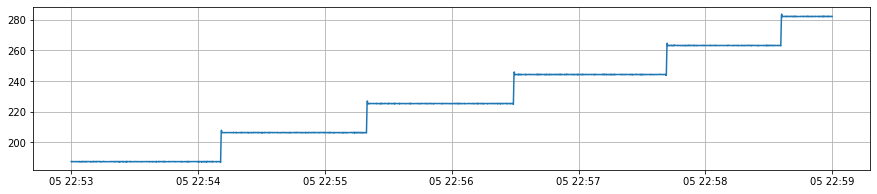

In [11]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.grid();
#forces on B1 are consistent between EFD and GUI

### if these are indeed the total forces measured, the sum should not change during this experiement.

In [12]:
print('beginning total = %.2f, ending total = %.2f'%(sum([df['axialForceMeasured%d'%i][0] for i in range(72)]), 
                     sum([df['axialForceMeasured%d'%i][-1] for i in range(72)])))
#LTS-107, sec 3.8.1 specifies M2 mirror mass budget ass 1600kg
print('mass budget = %.2f'%(1600*9.8))

beginning total = 15578.32, ending total = 15578.51
mass budget = 15680.00


In [13]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_203926_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [14]:
#This starting time is now consistent with binary file name as well
t[0]

datetime.datetime(2020, 3, 5, 22, 19, 27, 730000)

In [15]:
nn = len(t)
print('%d, time duration = %.0f minutes'%(nn, nn/20/60))

59999, time duration = 50 minutes


In [16]:
# cut out only the time period we are interested in
idx = (t>start) & (t<end)
data = {}
for n, v in ndata.items():
    if len(v.shape)>1:
        data[n] = v[idx,:]
    else:
        data[n] = v[idx]
t = t[idx]

### Now EFD force data match the binary force

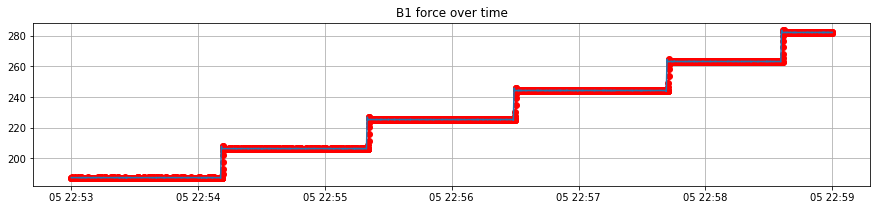

In [17]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(t, data['force'][:,0],'-ro')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.axialForceMeasured0)
plt.title('B1 force over time')
plt.grid();

#### All actuators forces, EFD vs. binary, over 5s

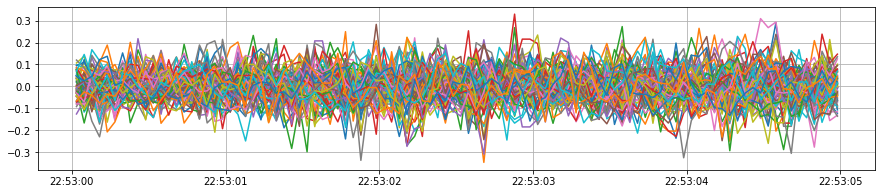

In [18]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    plt.plot(t[:100], data['force'][:100,i]-np.array(df['axialForceMeasured%d'%i][:100]))
plt.grid();

#### When we looked at the GUI, it appeared that F_CMD - F_CUR - F_HC = F_ERROR. Is that always true?
No, see below

spikes are with act #0
act#6, F_HC[0] = 0.00, residual[0] = 4.38
act#16, F_HC[0] = 0.00, residual[0] = 6.69
act#26, F_HC[0] = 0.00, residual[0] = 6.27


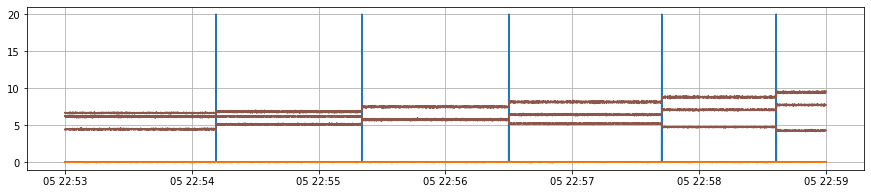

In [19]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]
    plt.plot(t, aa)
    if (aa[0]>3) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
    if np.any(aa>10) and i<69:
        print('spikes are with act #%d'%i)
plt.grid()

act#6, F_HC[0] = 0.00, residual[0] = 4.38
act#16, F_HC[0] = 0.00, residual[0] = 6.69
act#26, F_HC[0] = 0.00, residual[0] = 6.27


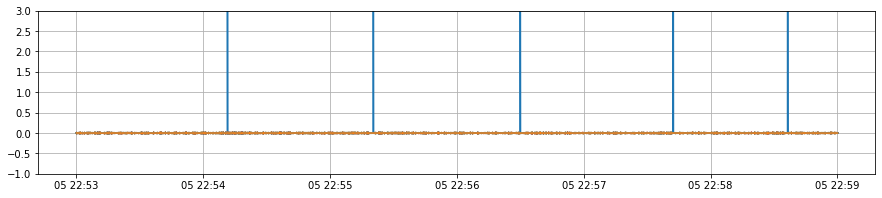

In [20]:
#zoom in around y=0
fig, ax = plt.subplots(figsize=(15,3))
for i in range(72):
    aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]
    plt.plot(t, aa)
    if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()
plt.ylim([-1, 3]);

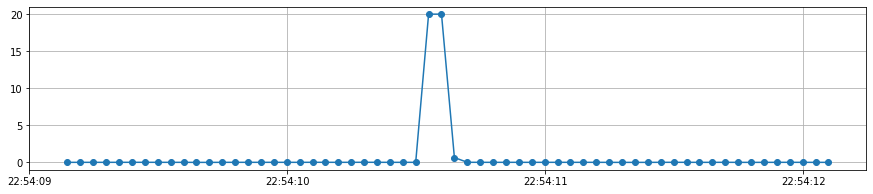

In [21]:
#zoom onto the spike with B1
tt = range(1400,1460,1)
fig, ax = plt.subplots(figsize=(15,3))
i = 0
aa = data['f_cmd'][:,i] - data['force'][:,i] - data['f_hp'][:,i]-data['f_error'][:,i]
plt.plot(t[tt], aa[tt],'-o')
plt.grid()

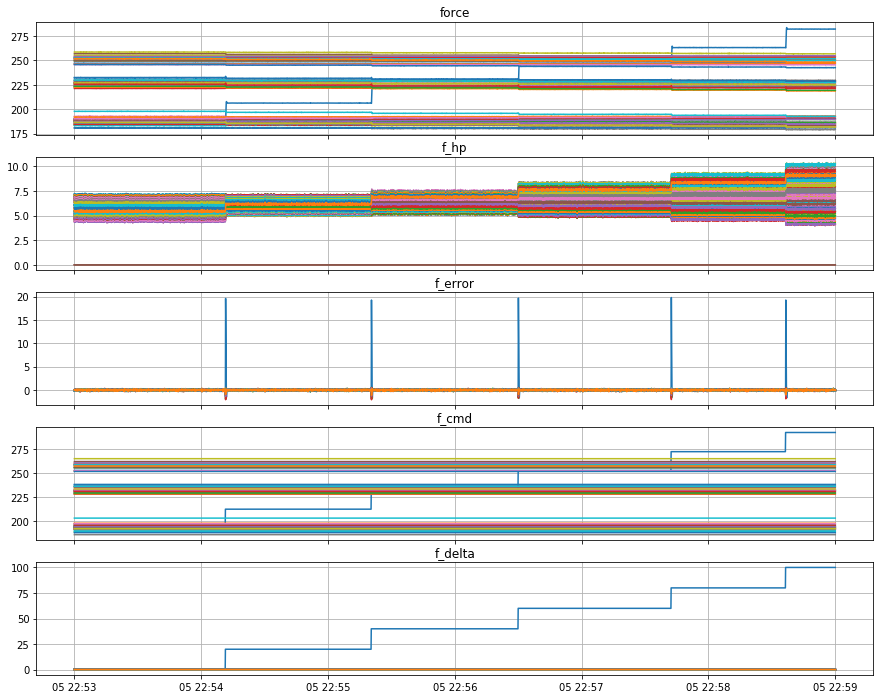

In [22]:
fig, ax = plt.subplots(5,1, sharex=True, figsize=(15,12))
for i in range(72):
    ax[0].plot(t, data['force'][:,i] )
ax[0].grid()
ax[0].set_title('force')

for i in range(72):
    ax[1].plot(t, data['f_hp'][:,i] )
ax[1].grid()
ax[1].set_title('f_hp')

for i in range(72):
    ax[2].plot(t, data['f_error'][:,i] )
ax[2].grid()
ax[2].set_title('f_error')

for i in range(72):
    ax[3].plot(t, data['f_cmd'][:,i] )
ax[3].grid()
ax[3].set_title('f_cmd')

for i in range(72):
    ax[4].plot(t, data['f_delta'][:,i] )
ax[4].grid()
ax[4].set_title('f_delta');
#fig.subplots_adjust(hspace=0)

In [23]:
df = await client.select_time_series('lsst.sal.MTM2.mirrorPositionMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-05 22:53:00.060000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5845662,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:53:00.097000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5845672,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:53:00.147000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5845682,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:53:00.196000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5845691,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:53:00.248000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5845701,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07


In [24]:
df.tail()

,piston,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,thetaZPosition,xPosition,xTilt,yPosition,yTilt
2020-03-05 22:58:59.798000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5911316,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:58:59.849000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5911325,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:58:59.899000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5911334,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:58:59.960000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5911343,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07
2020-03-05 22:58:59.998000+00:00,0.084669,1,1.583449e+09,37859,1.583449e+09,c3c6bc7d,5911352,1.583449e+09,-0.000006,-21.483128,4.076155e-07,-0.016116,4.125062e-07


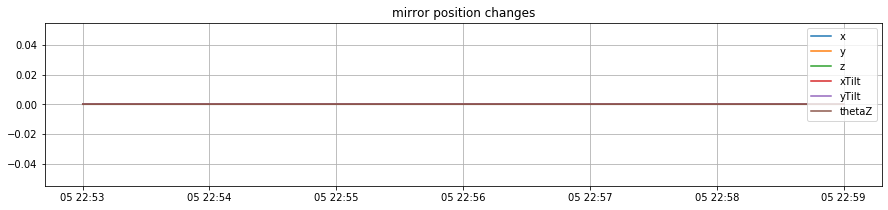

In [25]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xPosition-df.xPosition[0], label='x')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yPosition-df.yPosition[0], label='y')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.piston-df.piston[0], label='z')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.xTilt-df.xTilt[0], label='xTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.yTilt-df.yTilt[0], label='yTilt')
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df.thetaZPosition-df.thetaZPosition[0], label = 'thetaZ')
plt.title('mirror position changes')
plt.legend()
plt.grid();

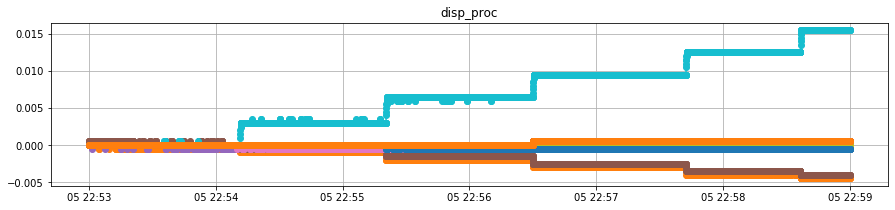

In [26]:
fig, ax = plt.subplots(figsize=(15,3))
for i in range(12):
    plt.plot(t, data['disp_proc'][:,i]-data['disp_proc'][0,i],'-o')
plt.title('disp_proc')
plt.grid()

sum of 72 = 398.83 N


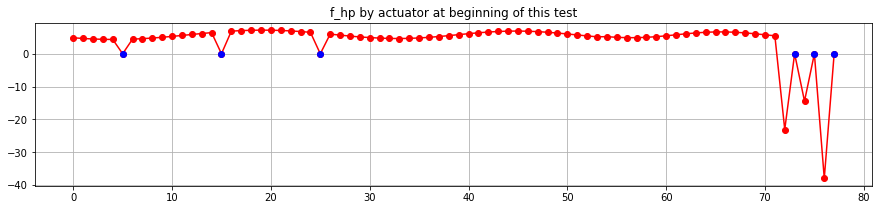

In [27]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['f_hp'][0,:],'-ro')
plt.plot(data['hp'][0]-1, data['f_hp'][0,data['hp'][0]-1],'bo',label='HP') #color HP with blue
plt.grid()
plt.title('f_hp by actuator at beginning of this test')
print('sum of 72 = %.2f N'%sum(data['f_hp'][0,:72]))
#sh*t, word doc says F_HC = f_hp, but why it is not zero on B6,16,26??? what is going on with last 3 actuators???

In [28]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]
#actLabels = [i+10 for i in range(72)]

414.37361482741346 398.83382345466777


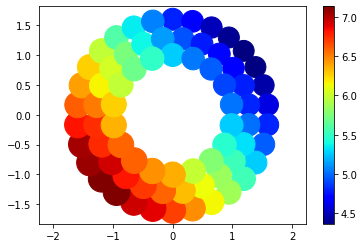

In [29]:
aa = data['f_cmd'][0,:72]- data['force'][0,:72] 
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.axis('equal')
plt.colorbar()
sumdiff = sum(data['f_cmd'][0,:72]- data['force'][0,:72] )
sumfhp = sum(data['f_hp'][0,:72])
print(sumdiff, sumfhp)

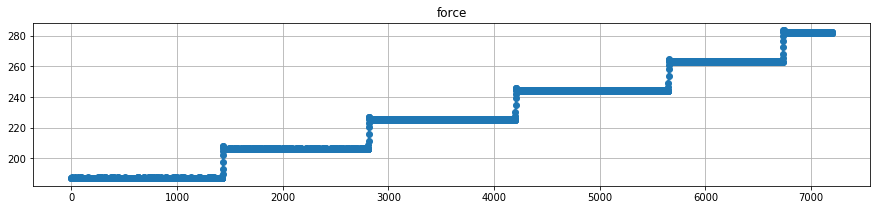

In [30]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(data['force'][:,0],'-o')
plt.title('force')
plt.grid() 

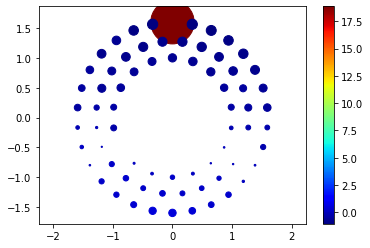

In [32]:
aa = data['force'][2000,:72]- data['force'][0,:72] 
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.axis('equal')
plt.colorbar();

In [34]:
aa[0] -= 20

In [74]:
#force distribution that produces 1N*m of Mx
F_FB_Mx = -1/sum(yact**2) * yact #imagine a Fy distribution where (Fy[i] in N) = (yact[i] in meter)
bb = F_FB_Mx* 20*yact[0] - 20/72.

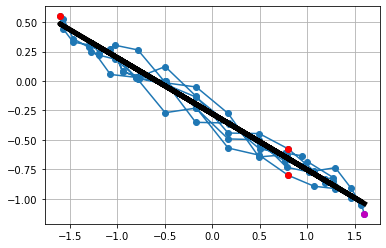

In [76]:
plt.plot(yact,aa,'-o')
plt.plot(yact[[5,15,25]], aa[[5,15,25]], 'ro')
plt.plot(yact[0], aa[0], 'mo')
plt.plot(yact,bb,'-k', linewidth=5)
plt.grid()

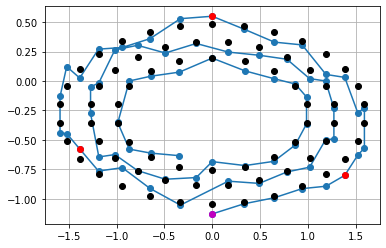

In [84]:
plt.plot(xact,aa,'-o')
plt.plot(xact[[5,15,25]], aa[[5,15,25]], 'ro')
plt.plot(xact[0], aa[0], 'mo')
plt.plot(xact,bb,'ko')
plt.grid()

In [79]:
yact[0]

1.601

In [67]:
aa = pd.read_csv('CtrlParameterFiles_2018-07-19_104314_surg/Kdc_Matrix_Params.csv', skiprows=8, header=None)
kdc = np.array(aa)[:,-1].reshape(aa[0][len(aa)-1],-1)
fdc = kdc*(-27.31/502.4) #kdc is in steps/N. fdc (force decoupling matrix, see correctability pdf page 41) is in N/N.
#see a01*ipynb: -27.31N = +502.4 steps (open loop)
aa = insertHPColumns(fdc.transpose())
fdc = aa.transpose()

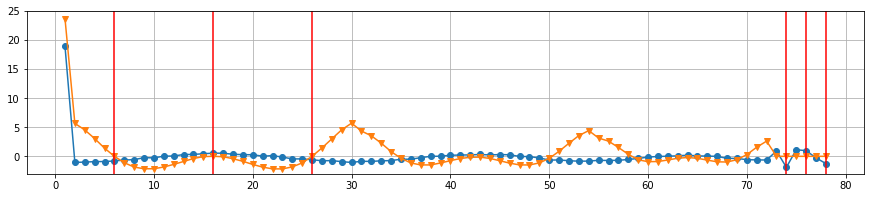

In [68]:
x0 = np.linspace(1,78, 78)
aa = data['force'][2000,:]- data['force'][0,:] 
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(x0,aa,'-o')
plt.plot(x0, fdc[:,0]*20,'-v')
#plt.plot(-kdc[:,0]*20/50, '-v')
plt.grid()
#yy=[-2, 4]
yy=[-3, 25]
plt.ylim(yy)
for i in data['hp'][0]:
    plt.plot([i,i],yy,'-r')
#ax.set_xticklabels(actLabels)

In [23]:
np.where(data['f_cmd'] - data['force'] - data['f_hp']-data['f_error']>10)

(array([1428, 1429, 2808, 2809, 4198, 4199, 5645, 5646, 6728, 6729]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

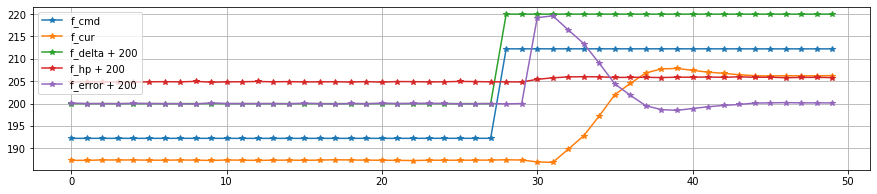

In [53]:
fig, ax = plt.subplots(figsize=(15,3))
i = 0
idx = range(1400,1450)
#aa = data['f_cmd'][idx,i] - data['force'][idx,i] -data['f_error'][idx,i] #- data['f_hp'][:,i]#
#plt.plot(aa,'-o')
plt.plot(data['f_cmd'][idx,i],'-*', label = 'f_cmd')
plt.plot(data['force'][idx,i],'-*', label = 'f_cur')
plt.plot(data['f_delta'][idx,i]+200,'-*', label = 'f_delta + 200')
plt.plot(data['f_hp'][idx,i]+200,'-*', label = 'f_hp + 200')
plt.plot(data['f_error'][idx,i]+200,'-*', label = 'f_error + 200')
plt.legend()
if (aa[0]>10) or i==5 or i==15 or i==25:
        print('act#%d, F_HC[0] = %.2f, residual[0] = %.2f'%(i+1, data['f_hp'][0,i], aa[0]))
plt.grid()

### It takes Force (f_cur) about 0.5s to catch up and 1s to stablize.

### This is our understanding from this test: (this test is very similar to a01_OL_stroke.ipynb, the only difference is that we commanded B1 via steps instead of stroke)
* stroke = position
* stroke and position are proportional to steps and encoder, 
    * each micron is 22.48 x 2.23 = 50 steps, or 184 x 2.23 = 410 encoder count
* stroke and position are inversely proportional to forces (M2 facing down)
    * each micron is 20/8.96 = 2.23N/um
* still cannot figure out what are f_hp, f_error, f_delta, etc.
### Q: Force/um changed from 2.7N/um in open loop to 2.2N/um in closed loop. why?
### Q: Just looking at how F_CUR changes, FB system doesn't seem to be working in closed loop. Why?